# Honey Production In The USA (1998-2012)

### Importing the essential libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the .csv file into pandas dataframe

In [2]:
dataset = pd.read_csv('C:\\Users\\jagan\\OneDrive\\Documents\\Machine Learning - Projects\\Kaggle_honey_prod\\honeyproduction.csv')

### Obtaining preliminary information on the dataset
numcol: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year

yieldpercol: Honey yield per colony. Unit is pounds

totalprod: Total production (numcol x yieldpercol). Unit is pounds

stocks: Refers to stocks held by producers. Unit is pounds

priceperlb: Refers to average price per pound based on expanded sales. Unit is dollars.

prodvalue: Value of production (totalprod x priceperlb). Unit is dollars.

Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
state          626 non-null object
numcol         626 non-null float64
yieldpercol    626 non-null int64
totalprod      626 non-null float64
stocks         626 non-null float64
priceperlb     626 non-null float64
prodvalue      626 non-null float64
year           626 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


### Taking a peek into the data

In [4]:
dataset.head(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998


In [5]:
dataset.tail(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
616,SD,260000.0,63,16380000.0,3604000.0,1.95,31941000.0,2012
617,TN,6000.0,61,366000.0,59000.0,2.93,1072000.0,2012
618,TX,92000.0,52,4784000.0,718000.0,2.00,9568000.0,2012
619,UT,25000.0,38,950000.0,209000.0,1.87,1777000.0,2012
620,VT,4000.0,60,240000.0,53000.0,2.39,574000.0,2012
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


### Understanding the Column data

In [6]:
dataset.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,626.000000,626.000000,6.260000e+02,6.260000e+02,626.000000,6.260000e+02,626.000000
mean,60284.345048,62.009585,4.169086e+06,1.318859e+06,1.409569,4.715741e+06,2004.864217
std,91077.087231,19.458754,6.883847e+06,2.272964e+06,0.638599,7.976110e+06,4.317306
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,48.000000,4.750000e+05,1.430000e+05,0.932500,7.592500e+05,2001.000000
50%,26000.000000,60.000000,1.533000e+06,4.395000e+05,1.360000,1.841500e+06,2005.000000
75%,63750.000000,74.000000,4.175250e+06,1.489500e+06,1.680000,4.703250e+06,2009.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,4.150000,6.961500e+07,2012.000000


### Deriving the consumption based on Production - Stocks

In [7]:
dataset['consumption'] = dataset['totalprod'] - dataset['stocks']

In [9]:
dataset.head(10)  #Just to check if consumption column is added to the dataset

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,consumption
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,977000.0
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,1815000.0
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,1757000.0
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998,25024000.0
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,350000.0
5,FL,230000.0,98,22540000.0,4508000.0,0.64,14426000.0,1998,18032000.0
6,GA,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998,3893000.0
7,HI,8000.0,118,944000.0,66000.0,0.77,727000.0,1998,878000.0
8,ID,120000.0,50,6000000.0,2220000.0,0.65,3900000.0,1998,3780000.0
9,IL,9000.0,71,639000.0,204000.0,1.19,760000.0,1998,435000.0


## How has honey production yield changed from 1998 to 2012?

In [10]:
data_by_year = dataset.groupby('year').mean()

In [71]:
#print(round(data_by_year))     #This will print the pivot table by mean by year.

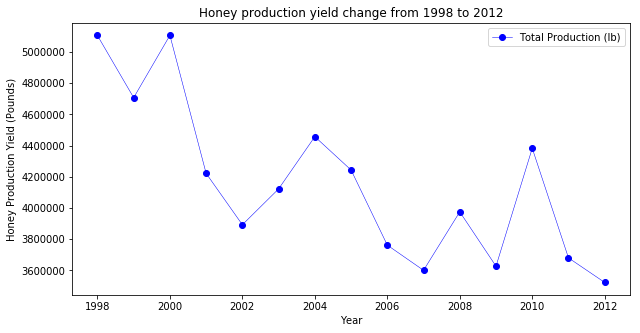

In [83]:
data_by_year[['totalprod']].plot(kind='line',style=['bo-'],linewidth=0.5,ax=plt.subplots(figsize=(10,5))[1],title='Honey production yield change from 1998 to 2012')
plt.xlabel('Year')
plt.ylabel('Honey Production Yield (Pounds)')
plt.legend(['Total Production (lb)'])

Inference - Mean Honey production across US declined significantly  

1998 - 2012 : -44%

2000 - 2002 : -31% 

2004 - 2007 : -24%

http://www.abc.net.au/news/2017-05-08/colony-collapse-ten-years-after-crisis-what-is-happening-to-bees/8507408

## How has Production Value changed from 1998 to 2012?

### Are there any patterns that can be observed between total honey production and value of production every year?

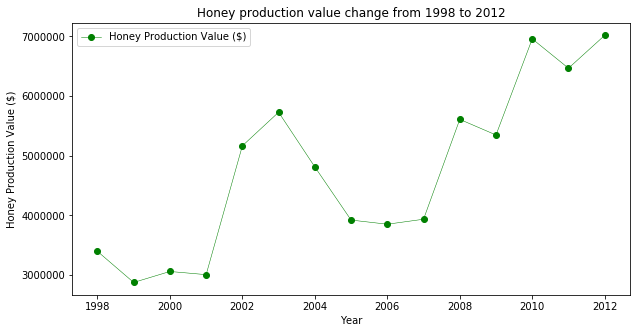

In [104]:
data_by_year[['prodvalue']].plot(kind='line',style=['go-'],linewidth=0.5,ax=plt.subplots(figsize=(10,5))[1],title='Honey production value change from 1998 to 2012')
plt.xlabel('Year')
plt.ylabel('Honey Production Value ($)')
plt.legend(['Honey Production Value ($)'])

Inference : Although honey production has deceased , the production value has increased significantly. Price/lb has constantly increased from 2005 - 2012.    

## How has Price/lb changed from 1998 to 2012?

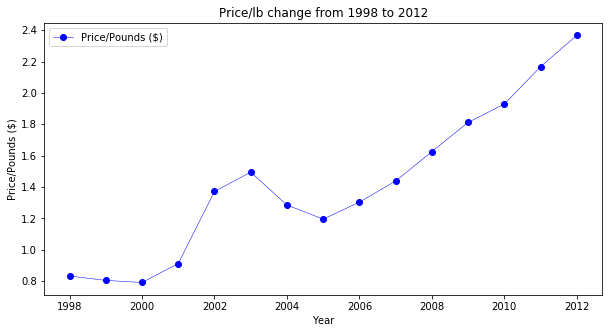

In [84]:
data_by_year[['priceperlb']].plot(kind='line',style=['bo-'],linewidth=0.5,ax=plt.subplots(figsize=(10,5))[1],title='Price/lb change from 1998 to 2012')
plt.xlabel('Year')
plt.ylabel('Price/Pounds ($)')
plt.legend(['Price/Pounds ($)'])

Inference - Mean price over the year has increased $.10 to $.20 from 2005 to 2012.

## How has demand or consumption changed over the years ?

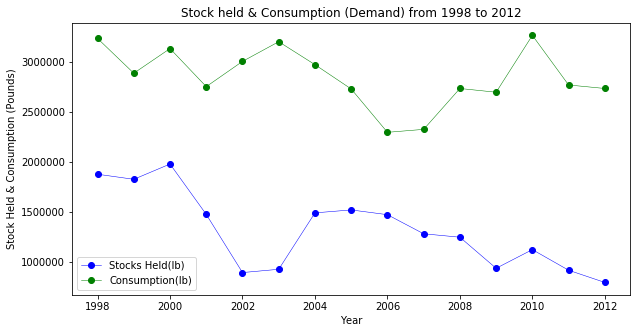

In [108]:
data_by_year[['stocks', 'consumption']].plot(kind='line',style=['bo-', 'go-'],linewidth=0.5,ax=plt.subplots(figsize=(10,5))[1],title='Stock held & Consumption (Demand) from 1998 to 2012')
plt.xlabel('Year')
plt.ylabel('Stock Held & Consumption (Pounds)')
plt.legend(['Stocks Held(lb)','Consumption(lb)'])

Inference : Stocks held has significantly decreased due to due to siginificant demand and less yield/Colony

## How has Yield/Colony changed from 1998 to 2012?

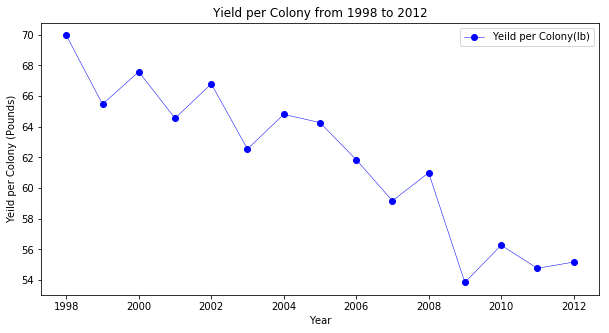

In [82]:
data_by_year[['yieldpercol']].plot(kind='line',style=['bo-'],linewidth=0.5,ax=plt.subplots(figsize=(10,5))[1],title='Yield per Colony from 1998 to 2012')
plt.xlabel('Year')
plt.ylabel('Yeild per Colony (Pounds)')
plt.legend(['Yeild per Colony(lb)'])

Inference : Yield / Colony has decreased from 70lb to 56lb over the period of 14 years. 25% decrease.

##  How has honey producing colony changed from 1998 to 2012?

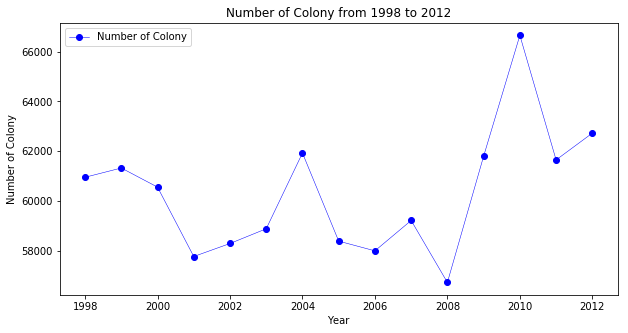

In [105]:
data_by_year[['numcol']].plot(kind='line',style=['bo-'],linewidth=0.5,ax=plt.subplots(figsize=(10,5))[1],title='Number of Colony from 1998 to 2012')
plt.xlabel('Year')
plt.ylabel('Number of Colony')
plt.legend(['Number of Colony'])

## How has value of production, which in some sense could be tied to demand, changed every year?

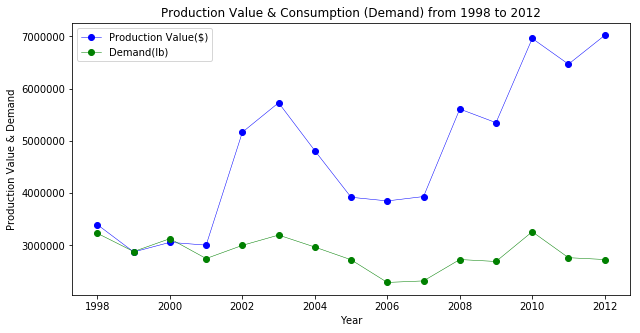

In [109]:
data_by_year[['prodvalue', 'consumption']].plot(kind='line',style=['bo-', 'go-'],linewidth=0.5,ax=plt.subplots(figsize=(10,5))[1],title='Production Value & Consumption (Demand) from 1998 to 2012')
plt.xlabel('Year')
plt.ylabel('Production Value & Demand')
plt.legend(['Production Value($)','Demand(lb)'])

## Which state produce most and least ?

### Top 10 States

In [95]:
data_by_state = dataset.groupby('state').mean().sort_values('totalprod', ascending=False)

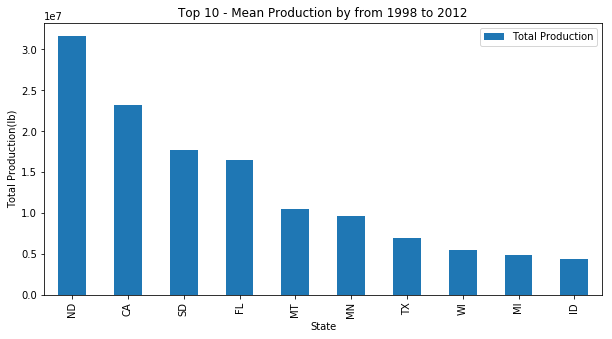

In [97]:
data_by_state[['totalprod']].head(10).plot(kind='bar',ax=plt.subplots(figsize=(10,5))[1],title='Top 10 - Mean Production by from 1998 to 2012')
plt.xlabel('State')
plt.ylabel('Total Production(lb)')
plt.legend(['Total Production'])

Inference : North Dakota produced maximum honey from 1988 to 2012. Other leading states include California and South Dakota

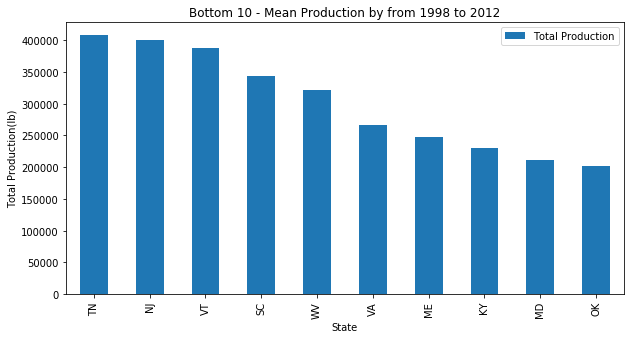

In [98]:
data_by_state[['totalprod']].tail(10).plot(kind='bar',ax=plt.subplots(figsize=(10,5))[1],title='Bottom 10 - Mean Production by from 1998 to 2012')
plt.xlabel('State')
plt.ylabel('Total Production(lb)')
plt.legend(['Total Production'])

Inference : Oklahoma produced least honey from 1988 to 2012. Bottom states Kentucky and Maryland.

## Which state have experienced the most change in honey yield? 

### Calculating the maximum production of all states

In [133]:
state_max = dataset[['state','totalprod']].groupby('state').max()
state_max.reset_index(level=0,inplace=True)
state_max.columns = ['State','Max Prod']
state_max.head()

,State,Max Prod
0,AL,1248000.0
1,AR,4900000.0
2,AZ,3300000.0
3,CA,37350000.0
4,CO,2700000.0


### Calculating the minimum production of all states

In [130]:
state_min = dataset[['state','totalprod']].groupby('state').min()
state_min.reset_index(level=0,inplace=True)
state_min.columns = ['State','Min Prod']
state_min.head()

,State,Min Prod
0,AL,432000.0
1,AR,1368000.0
2,AZ,1012000.0
3,CA,11550000.0
4,CO,1200000.0


In [142]:
change_in_yield = pd.merge(state_max,state_min,how='inner',on='State')
change_in_yield.head()

,State,Max Prod,Min Prod
0,AL,1248000.0,432000.0
1,AR,4900000.0,1368000.0
2,AZ,3300000.0,1012000.0
3,CA,37350000.0,11550000.0
4,CO,2700000.0,1200000.0


In [160]:
change_in_yield['per_cent_change(%)'] = ((change_in_yield['Max Prod'] - change_in_yield['Min Prod'])/change_in_yield['Max Prod'])*100
change_in_yield.sort_values(by='per_cent_change(%)', ascending=False, inplace=True)
change_in_yield.head(10) # Top 10 . Max Change

,State,Max Prod,Min Prod,per_cent_change(%)
19,MO,1725000.0,344000.0,80.057971
26,NM,960000.0,246000.0,74.375000
16,ME,451000.0,120000.0,73.392461
15,MD,308000.0,84000.0,72.727273
12,KS,1120000.0,308000.0,72.500000
39,VT,623000.0,172000.0,72.391653
1,AR,4900000.0,1368000.0,72.081633
8,IA,3900000.0,1092000.0,72.000000
2,AZ,3300000.0,1012000.0,69.333333
3,CA,37350000.0,11550000.0,69.076305


In [164]:
change_in_yield.tail(10)  #Bottom 10. Least Change

,State,Max Prod,Min Prod,per_cent_change(%)
23,ND,46410000.0,24000000.0,48.287007
30,OK,270000.0,141000.0,47.777778
20,MS,2124000.0,1122000.0,47.175141
21,MT,14030000.0,7540000.0,46.258019
6,GA,4662000.0,2530000.0,45.731446
7,HI,1179000.0,640000.0,45.716709
40,WA,3528000.0,2024000.0,42.630385
17,MI,6800000.0,3960000.0,41.764706
33,SC,470000.0,280000.0,40.425532
31,OR,2565000.0,1638000.0,36.140351


Text(0,0.5,'% Decline')

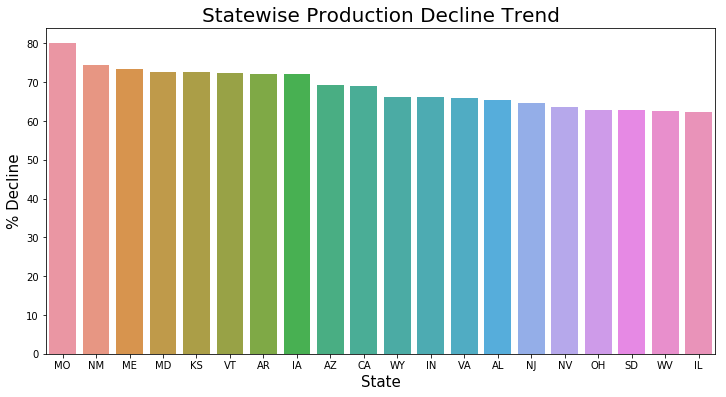

In [163]:
#change_in_yield[['per_cent_change(%)']].plot(kind='bar',ax=plt.subplots(figsize=(10,5))[1],title='per_cent_change(%)')
plt.figure(figsize=(12,6))
sns.barplot(x='State',y='per_cent_change(%)',data= change_in_yield.head(20))
plt.title('Statewise Production Decline Trend',fontsize=20)
plt.xlabel("State",fontsize=15)
plt.ylabel("% Decline",fontsize=15)